In [1]:
import numpy as np
import os
from sklearn.svm import SVC
import pickle
import argparse
import sys
import pdb
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [10]:
BASE_DIR = '/root/class/cmu/LSMA/ls-hw1'
DATA_DIR = '/shared/youngkim/dataset'
os.chdir(DATA_DIR)

class args:
    feat_dir = 'avg_pooling/y_scns/'
    feat_dim = 50
    list_videos = os.path.join(DATA_DIR, 'labels/kfold_df.csv')
    output_file = 'models/mfcc-50.svm.multiclass.model'
    feat_appendix = '.csv'

In [4]:
df = pd.read_csv(args.list_videos)
len(df), df.head()

(7496,
                              Id  Category  kfold
 0  NjUzNjkxMTk0MzI5NDYwNTA2NA==         0    3.0
 1  LTcxNTE1MDY1Mjc5NzMxMTExNDI=         0    0.0
 2  NTMyNTQxODcwODc5MjU2NDk4NA==         0    3.0
 3  LTY0NjAxNjcyNTUyNDI5Mzc2MTE=         0    1.0
 4  NTgzMjc4Mzk0MjQwMzYyMjA1NQ==         0    1.0)

In [5]:
train_df = df[df.kfold != 4.0].copy().reset_index(drop=True)
train_df, len(train_df)

(                                Id  Category  kfold
 0     NjUzNjkxMTk0MzI5NDYwNTA2NA==         0    3.0
 1     LTcxNTE1MDY1Mjc5NzMxMTExNDI=         0    0.0
 2     NTMyNTQxODcwODc5MjU2NDk4NA==         0    3.0
 3     LTY0NjAxNjcyNTUyNDI5Mzc2MTE=         0    1.0
 4     NTgzMjc4Mzk0MjQwMzYyMjA1NQ==         0    1.0
 ...                            ...       ...    ...
 5992  NTcyMTgwOTU4NjUxMjE2NTIwMA==        14    0.0
 5993  LTUxMTQ5Mjg2OTQyNjgyMTc1NzA=        14    1.0
 5994  NDA2NjM0NDg5MDc3NzM3NjQ5OA==        14    0.0
 5995  LTEwMzgyODQzNTYwMjM5NDY3NzI=        14    0.0
 5996  LTQzOTI1MDQ1OTQ3NzUyMjQ4Mg==        14    3.0
 
 [5997 rows x 3 columns],
 5997)

In [6]:
val_df = df[df.kfold == 4.0].copy().reset_index(drop=True)
val_df, len(val_df)

(                                Id  Category  kfold
 0     LTc3NzAzMjA5ODk0ODc0OTQyNDI=         0    4.0
 1     MTY2MDM5NzQ4NTYyMDU5MDcxNA==         0    4.0
 2     LTc2MjMwNzM2OTM0NDg3NzM1Njk=         0    4.0
 3     NjIyOTQ3MTMyOTk4OTQyNDg3Mw==         0    4.0
 4     LTQ1NDc0MzE1MzIxOTU0NzYwMzg=         0    4.0
 ...                            ...       ...    ...
 1494  LTIxNzI4NzM0ODQwMTY3MzYzMjg=        14    4.0
 1495  Mjc4NDk1MTYyNjI1MTU2OTM5OA==        14    4.0
 1496  ODkzMDk5NjEzODg2Njk5MjY3OA==        14    4.0
 1497  LTcxMzIwMDY2OTM1MDM0OTgwMDI=        14    4.0
 1498  LTIwMTA2OTMzMjU2MzMyNzExMDA=        14    4.0
 
 [1499 rows x 3 columns],
 1499)

In [12]:
train_feat_list, train_label_list = [], []

for video_id, label in zip(train_df.Id, train_df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        train_feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        train_label_list.append(int(label))
    else:
        print(video_id)

In [13]:
train_y = np.array(train_label_list)
train_X = np.array(train_feat_list)

In [14]:
train_X.shape

(5997, 401)

In [15]:
val_feat_list, val_label_list = [], []

for video_id, label in zip(val_df.Id, val_df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        val_feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        val_label_list.append(int(label))
    else:
        print(video_id)

val_y = np.array(val_label_list)
val_X = np.array(val_feat_list)

In [16]:
feat_list, label_list = [], []

for video_id, label in zip(df.Id, df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        label_list.append(int(label))
    else:
        print(video_id)

y = np.array(label_list)
X = np.array(feat_list)

In [18]:
clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf")
result = pd.DataFrame(cross_validate(clf, X, y, cv =5))
print(result)
print('mean of cross validation: ', np.mean(result.test_score))

    fit_time  score_time  test_score
0  15.019957    3.446373    0.410000
1  14.339580    3.622315    0.380921
2  14.459688    3.649483    0.390927
3  14.288757    3.399489    0.394930
4  14.767857    3.627563    0.354903
mean of cross validation:  0.3863362241494329


In [19]:
svm_clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf")
parameters = {'C': [0.01, 0.1, 1, 10, 25, 50]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X, y)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
5,50.00,0.520943
4,25.00,0.508670
3,10.00,0.486524
2,1.00,0.386336
1,0.10,0.192905
0,0.01,0.149151


In [21]:
svm_clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf")
parameters = {'C': [75, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X, y)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
1,100,0.531482
0,75,0.526547


In [20]:
result = result.sort_values(by='mean_test_score', ascending=False)
result[:10]

,C,mean_test_score
5,50.00,0.520943
4,25.00,0.508670
3,10.00,0.486524
2,1.00,0.386336
1,0.10,0.192905
0,0.01,0.149151


In [22]:
clf = SVC(cache_size=2000, decision_function_shape='ovr', kernel="rbf", C=100)
clf.fit(train_X, train_y)

SVC(C=100, break_ties=False, cache_size=2000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
val_pred = clf.predict(val_X)
print(f"prediction accuracy: {np.mean(val_pred == val_y):.4f}")
cf_matrix = confusion_matrix(val_y, val_pred)
cf_matrix


prediction accuracy: 0.5297


array([[53,  2, 15,  6,  4,  1,  0,  0,  0,  0,  0,  2,  4,  0, 13],
       [ 1, 52,  0,  4,  4,  1, 17,  0,  2,  0,  1,  6,  3,  9,  0],
       [11,  3, 38,  9,  2,  8,  5,  0,  0,  3,  0,  2,  2,  0, 16],
       [11,  0, 10, 35,  4,  5,  7,  0,  0,  4,  0,  5,  9,  0, 10],
       [ 0,  3,  5,  5, 61,  2,  8,  1,  0,  0,  0,  9,  4,  1,  1],
       [ 1,  0,  2,  1,  2, 54,  7,  3,  3,  5,  0, 17,  1,  2,  2],
       [ 0,  2,  0,  0,  1,  1, 71,  8,  0,  7,  1,  5,  3,  1,  0],
       [ 0,  0,  0,  1,  1,  5, 30, 43,  0,  4,  1, 11,  2,  0,  2],
       [ 2,  2,  2,  1,  0,  1, 12,  0, 61,  4,  2,  0,  9,  4,  0],
       [ 5,  1,  3,  0,  0,  1, 12,  1,  7, 37, 19,  0, 11,  2,  1],
       [ 4,  0,  1,  1,  0,  0,  2,  0,  2, 12, 66,  1,  8,  0,  3],
       [ 0,  1,  3,  1,  4,  4, 19,  9,  1,  3,  0, 51,  1,  1,  2],
       [ 9,  1,  2,  0,  3,  2,  8,  0,  5, 17,  7,  0, 40,  0,  6],
       [ 0,  6,  1,  0,  1,  0,  8,  0,  8,  4,  0,  0,  4, 68,  0],
       [10,  0,  5,  7,  1,  2,  2

<AxesSubplot:>

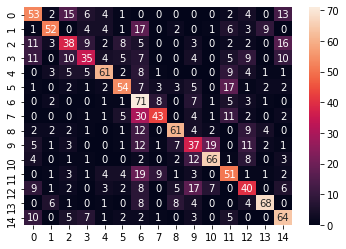

In [24]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [25]:
args.output_file = 'models/soundnet.y_scns.svm.best.model'
pickle.dump(clf, open(args.output_file, 'wb'))